In [2]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data using the same method for both training and test data
x_train = x_train / 255.0
x_test = x_test / 255.0


# Reshape the data to add an extra dimension for convolutional layers
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Training Samples dimension:", x_trainr.shape)
print("Testing Samples dimension:", x_testr.shape)

# Create the neural network model
model = Sequential()

# First Convolution Layer
model.add(Conv2D(64, (3, 3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))  # Add Dropout layer

# Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.5))  # Add Dropout layer

# Output Layer
model.add(Dense(10))
model.add(Activation("softmax"))

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# Train the model
model.fit(x_trainr, y_train, epochs=10, validation_split=0.3)  # Increase the number of epochs

# Save the model to an .h5 file
model.save('mnist_model.h5')


Training Samples dimension: (60000, 28, 28, 1)
Testing Samples dimension: (10000, 28, 28, 1)


C:\Users\MicroApt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.4994 - loss: 1.3815 - val_accuracy: 0.9576 - val_loss: 0.1569
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.8848 - loss: 0.3894 - val_accuracy: 0.9701 - val_loss: 0.1132
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.9241 - loss: 0.2655 - val_accuracy: 0.9734 - val_loss: 0.1049
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9368 - loss: 0.2253 - val_accuracy: 0.9742 - val_loss: 0.1080
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.9462 - loss: 0.1932 - val_accuracy: 0.9794 - val_loss: 0.0874
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9549 - loss: 0.1605 - val_accuracy: 0.9739 - val_loss: 0.1338
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - accuracy: 0.9549 - loss: 0.1560 - val_accuracy: 0.9830 - val_loss: 0.0851
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9617 -

K-Nearest Neighbors: 0.9715
Support Vector Classifier: 0.9776
Random Forest: 0.9682
Neural Network: 0.9796

Most accurate model: Neural Network with accuracy of 0.9796


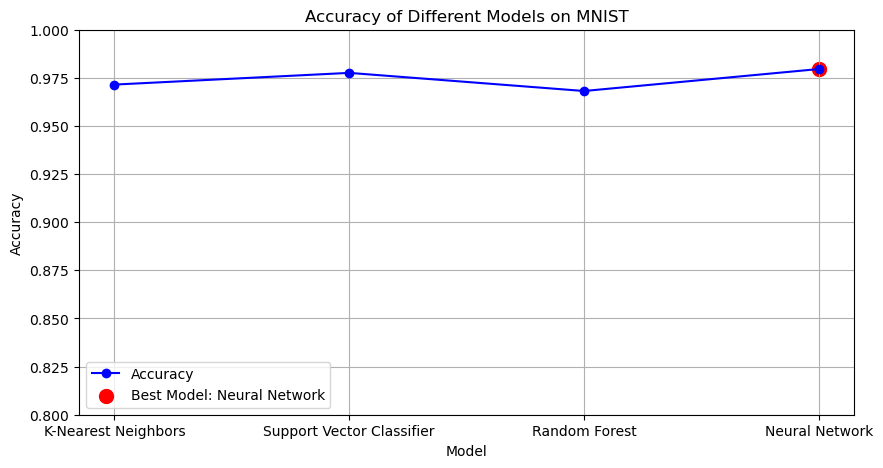

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data: Flatten the 28x28 images to a 784-dimensional vector
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalize the data to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Further split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=100)
}

# Train and evaluate each model
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"{model_name}: {accuracy:.4f}")

# Find the most accurate model
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model_name]

print(f"\nMost accurate model: {best_model_name} with accuracy of {best_accuracy:.4f}")

# Plotting the accuracies using a line graph
model_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())
best_model_index = model_names.index(best_model_name)

plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')

# Highlight the most accurate model
plt.scatter([model_names[best_model_index]], [accuracies[best_model_index]], color='red', s=100, label=f'Best Model: {best_model_name}')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on MNIST')
plt.ylim(0.8, 1.0)
plt.legend()
plt.grid(True)
plt.show()


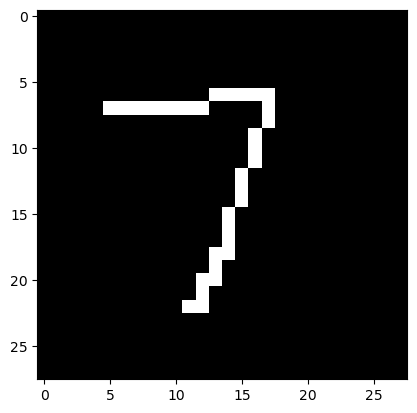

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Recognized digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
No file selected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
import sys
import os
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QMessageBox, QWidget, QVBoxLayout, QFileDialog, QSpacerItem, QSizePolicy
from PyQt5.QtGui import QImage, QMouseEvent, QPen, QPainter, QPaintEvent, QPalette, QBrush
from PyQt5.QtCore import Qt, QPoint
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

IMG_SIZE = 28

# Load the pre-trained model
model = load_model('mnist_model.h5')

# Function to process and predict the uploaded image
def process_and_predict(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.show()

    # Resize the image to match the training data
    resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)

    # Normalize the image
    normalized_img = resized / 255.0

    # Reshape the image to fit the model input
    reshaped_img = np.array(normalized_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    if np.all(reshaped_img == 0):
            self.show_dialog("Empty canvas, draw something.")
            return
    else:
        predictions = model.predict(reshaped_img)
        print("Recognized digit:", np.argmax(predictions))

# Function to upload an image and predict
def upload_image_and_predict():
    options = QFileDialog.Options()
    options |= QFileDialog.ReadOnly
    filename, _ = QFileDialog.getOpenFileName(None, "Select Image", "", "Image Files (*.png *.jpg *.jpeg);;All Files (*)", options=options)
    if filename:
        process_and_predict(filename)
    else:
        print("No file selected")

class Canvas(QWidget):
    def __init__(self):
        super().__init__()
        self.setFixedSize(IMG_SIZE * 10, IMG_SIZE * 10)  # Scale up for better drawing visibility
        self.image = QImage(IMG_SIZE, IMG_SIZE, QImage.Format_ARGB32)
        self.image.fill(Qt.black)  # Fill canvas with black

        self.drawing = False
        self.brush_size = 1  # Adjust brush size for 28x28 canvas
        self.brush_color = Qt.white  # Brush color is white
        self.last_point = QPoint()

    def mousePressEvent(self, event: QMouseEvent):
        if event.button() == Qt.LeftButton:
            self.drawing = True
            self.last_point = event.pos() / 10  # Adjust for scaled size

    def mouseMoveEvent(self, event: QMouseEvent):
        if (event.buttons() & Qt.LeftButton) and self.drawing:
            painter = QPainter(self.image)
            painter.setPen(QPen(self.brush_color, self.brush_size, Qt.SolidLine, Qt.RoundCap, Qt.RoundJoin))
            painter.drawLine(self.last_point, event.pos() / 10)  # Adjust for scaled size
            self.last_point = event.pos() / 10  # Adjust for scaled size
            self.update()

    def mouseReleaseEvent(self, event: QMouseEvent):
        if event.button() == Qt.LeftButton:
            self.drawing = False

    def paintEvent(self, event: QPaintEvent):
        canvas_painter = QPainter(self)
        scaled_image = self.image.scaled(self.size())
        canvas_painter.drawImage(self.rect(), scaled_image, scaled_image.rect())

    def clear(self):
        self.image.fill(Qt.black)
        self.update()

    def get_image(self):
        return self.image

class DrawingWindow(QMainWindow):
    def __init__(self, menu_window):
        super().__init__()
        self.setFixedSize(400, 500)
        self.setWindowTitle('Handwritten Digit Recognition')

        self.menu_window = menu_window

        self.canvas = Canvas()

        self.initUI()

    def initUI(self):
        central_widget = QWidget(self)
        self.setCentralWidget(central_widget)

        layout = QVBoxLayout()
        central_widget.setLayout(layout)

        layout.addWidget(self.canvas)

        self.init_btn_clear(layout)
        self.init_btn_recognize(layout)
        self.init_btn_exit(layout)

    def init_btn_clear(self, layout):
        btn = QPushButton('Clear', self)
        btn.clicked.connect(self.canvas.clear)
        layout.addWidget(btn)

    def init_btn_recognize(self, layout):
        btn = QPushButton('Recognize', self)
        btn.clicked.connect(self.recognize)
        layout.addWidget(btn)

    def init_btn_exit(self, layout):
        btn = QPushButton('Exit', self)
        btn.clicked.connect(self.exit_to_menu)
        layout.addWidget(btn)

    def recognize(self):
        # Convert QImage to numpy array
        img = self.image_to_array(self.canvas.get_image())

        # Process the image and predict the digit
        prediction = self.process_and_predict(img)

        # Show the result in a dialog box
        self.show_dialog(f"Recognized digit: {prediction}")

    def image_to_array(self, image):
        size = image.size()
        s = image.bits().asstring(size.width() * size.height() * 4)
        img = np.frombuffer(s, dtype=np.uint8).reshape((size.height(), size.width(), 4))
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
        return img

    def process_and_predict(self, img):
        # Resize the image to match the training data
        resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)

        # Normalize the image
        normalized_img = resized / 255.0

        # Reshape the image to fit the model input
        reshaped_img = np.array(normalized_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        
        if np.all(reshaped_img == 0):
            self.show_dialog("Empty canvas, draw something.")
            return
        else:
            predictions = model.predict(reshaped_img)
            return np.argmax(predictions)

    def show_dialog(self, message):
        msg = QMessageBox()
        msg.setIcon(QMessageBox.Information)
        msg.setText(message)
        msg.setWindowTitle("Prediction")
        msg.setStandardButtons(QMessageBox.Ok)
        msg.exec_()

    def exit_to_menu(self):
        self.close()
        self.menu_window.show()

class MenuWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setFixedSize(768, 593)
        self.setWindowTitle('Menu')

        self.initUI()

    def initUI(self):
        central_widget = QWidget(self)
        self.setCentralWidget(central_widget)

        # Set background image
        palette = QPalette()
        palette.setBrush(QPalette.Background, QBrush(QImage("bg.png")))
        central_widget.setAutoFillBackground(True)
        central_widget.setPalette(palette)

        layout = QVBoxLayout()
        central_widget.setLayout(layout)

        # Add spacers to center buttons
        layout.addSpacerItem(QSpacerItem(20, 40, QSizePolicy.Minimum, QSizePolicy.Expanding))
        
        self.init_btn_upload(layout)
        self.init_btn_draw(layout)
        self.init_btn_exit(layout)
        
        layout.addSpacerItem(QSpacerItem(20, 40, QSizePolicy.Minimum, QSizePolicy.Expanding))

    def init_btn_upload(self, layout):
        btn = QPushButton('Upload', self)
        btn.setFixedSize(100, 40)  # Set smaller size for the button
        btn.clicked.connect(upload_image_and_predict)
        layout.addWidget(btn, 0, Qt.AlignCenter)

    def init_btn_draw(self, layout):
        btn = QPushButton('Draw', self)
        btn.setFixedSize(100, 40)  # Set smaller size for the button
        btn.clicked.connect(self.open_drawing_window)
        layout.addWidget(btn, 0, Qt.AlignCenter)

    def open_drawing_window(self):
        self.drawing_window = DrawingWindow(self)
        self.drawing_window.show()
        self.hide()

    def init_btn_exit(self, layout):
        btn = QPushButton('Exit', self)
        btn.setFixedSize(100, 40)  # Set smaller size for the button
        btn.clicked.connect(self.close_application)
        layout.addWidget(btn, 0, Qt.AlignCenter)

    def close_application(self):
        sys.exit()

if __name__ == "__main__":
    app = QApplication(sys.argv)
    menu_window = MenuWindow()
    menu_window.show()
    sys.exit(app.exec_())
